# SCS_3253_032 Machine Learning

### Data Mining the Water Table




# Background

This data set is pulled from a drivendata.org competition.  The goal of the competition is to predict the likelihood of water pumps being one of: functional, functional needs repair, or non functional, using data sourced from the Tanzanian Ministry of Water, and Taarifa. 

There are three data sets involved.

*   A training dataset, which contains 40 columns of data.  This will act as the train-test split dataset, and the individual columns will be used as the predictors for the results.
*   A training labels dataset, which contains an id column and the status of the water pumps. This will be joined with the training dataset on the id, so as to provide the results to the train/test split - this will be what we're looking to predict.  
*   A test dataset which is a clean dataset we can use to predict the functionality of water pumps based on our train/test split.  We did not use this, as we don't have answers to check against.




# Plan

Our approach for this dataset will be a supervised learning approach, using classification machine learning algorithms.  We will run several different algorithms, then choose the best one.  

We can check our results against the leaderboard [here](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/leaderboard/), but have not entered the competition. As an exercise, this will test our ability to use classification ML models.

# Steps for This Approach
Our approach will follow the below general outline for the project:

1.   Import all the libraries
2.   Import our data from a shared github location.
3.   Combine the training set values and labels into one training set.  
4.   Initial data exploration.  Here we will try and graphically represent some correlations or ratios based on functionality.
3.   Clean the data, removing unnecessary columns and filling in any missing values.
4.   Onehotencode the training data so it is uniform and the machine learning algorithms can process it.
5.   Create a train/test split.
6.   Using this train/test split, run several classification algorithms - Logistic Regression, Random Forest, K-Nearest Neighbors, gradient boosting, and neural networks.
7.   Using these results, choose the best algorithm.
8.   Assess the results.

In [ ]:
#Note: Please install the below and restart the runtime.

!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 14 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (199 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144865 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

In [ ]:
# Add all libraries here
import numpy as np  #keep
import pandas as pd  #keep
import seaborn as sns  #keep
import matplotlib.pyplot as plt  #keep
import os  #keep
import pickle
import yellowbrick
from mpl_toolkits.basemap import Basemap  #keep
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from IPython.display import display
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
#from bokeh.plotting import gmap
#from bokeh.models import GMapOptions
#from bokeh.io import show
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#from sklearn.externals import joblib

pd.options.display.max_columns = None
np.random.seed(42)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Below will be where we import the data from github:

In [ ]:
# Importing Data from Github (this is so we can all access it and it can be accessed from any other user)

training_set_values = pd.read_csv(
    'https://github.com/krupal-p/WaterPumpML/raw/main/Training_set_values.csv')
training_set_labels = pd.read_csv(
    'https://github.com/krupal-p/WaterPumpML/raw/main/training_set_labels.csv')
test_set_values = pd.read_csv(
    'https://github.com/krupal-p/WaterPumpML/raw/main/test_set_values.csv',
    sep=',')

# Initial Data Exploration

In [ ]:
# let's see what types we have on this one.
training_set_values.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

We can see the data in the training set has 40 columns, with both numbers and words applied.  This will need to be cleaned.  

We will go into further detail as to which columns are most important to keep in the cleanup sections.

In [ ]:
#to check if there is any null item in the columns in ascending order.
training_set_values.isnull().sum().sort_values(ascending=False)

scheme_name              28166
scheme_management         3877
installer                 3655
funder                    3635
public_meeting            3334
permit                    3056
subvillage                 371
ward                         0
lga                          0
district_code                0
region_code                  0
region                       0
waterpoint_type_group        0
population                   0
num_private                  0
wpt_name                     0
latitude                     0
longitude                    0
gps_height                   0
date_recorded                0
amount_tsh                   0
basin                        0
recorded_by                  0
waterpoint_type              0
water_quality                0
source_class                 0
source_type                  0
source                       0
quantity_group               0
quantity                     0
quality_group                0
payment_type                 0
construc

We do have several columns with null values, which we will clean up in later steps.

# Initial Visualiaztion

First, we have to join the training set values with training set lables.

In [ ]:
#join labels to data on "id"
train_data = training_set_values.merge(training_set_labels,
                                       how='left',
                                       left_on='id',
                                       right_on='id',
                                       copy=False)

Now our training dataset 

In [ ]:
print(train_data[['id', 'status_group']].head(10))

      id    status_group
0  69572      functional
1   8776      functional
2  34310      functional
3  67743  non functional
4  19728      functional
5   9944      functional
6  19816  non functional
7  54551  non functional
8  53934  non functional
9  46144      functional


We see they have been joined.  So far, so good.

Next, let's have a look at some graphs, to see where things stand.

We begin our exploration by taking a glance at the target variable.

status_group, has 3 classes:

functional (~55%)

*   functional (~55%)



*   non functional (~37%)
* functional needs repair (~7% imbalanced!)



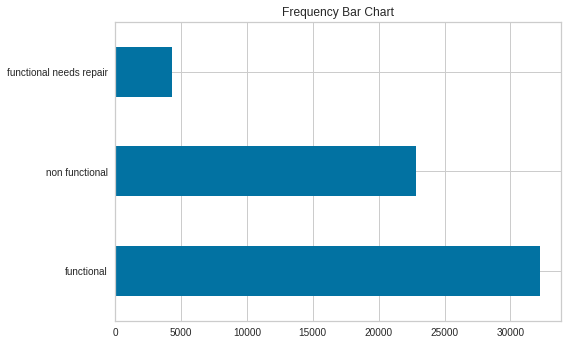

In [ ]:
train_data.status_group.value_counts().plot(kind='barh')
plt.title('Frequency Bar Chart');

Our data appears to be imbalanced, prticularly at the target variable.


> 



Text(0, 0.5, 'Pump Health Prevalence %')

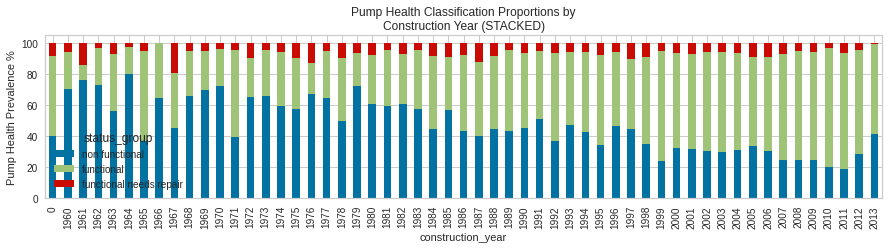

In [ ]:
# to Check the outcome variable proportion by year it has beed read:

check1 = pd.crosstab(train_data.status_group,
                     train_data.construction_year).apply(lambda col: (
                         (col / col.sum()).round(3)) * 100,
                                                         axis=0)
check1 = check1.reindex(
    ['non functional', 'functional', 'functional needs repair'])
check1.transpose().plot(
    kind='bar',
    legend='status_group',
    stacked=True,
    figsize=(15, 3),
    title=
    'Pump Health Classification Proportions by\nConstruction Year (STACKED)')
plt.ylabel('Pump Health Prevalence %')

#Only 1 data point in 2002. Suggest removing that.

Further expoloration - this time by year - breaks the data out by what year the pump was built, and the functional state.  

Note - the data has not been cleaned, so there are many zeroes.

The same data, but in tabular format:

In [ ]:
# to check the Pump health proportion by construction years:
check2 = pd.crosstab(train_data.status_group,
                     train_data.construction_year).apply(lambda col: (
                         (col / col.sum()).round(3)) * 100,
                                                         axis=0)
check2 = check2.reindex(
    ['non functional', 'functional', 'functional needs repair'])
check2

construction_year,0,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
status_group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
non functional,40.4,70.6,76.2,73.3,56.5,80.0,36.8,64.7,45.5,66.2,69.5,72.3,39.3,65.3,65.8,59.6,57.7,66.9,64.4,49.6,72.4,60.8,59.7,61.0,57.4,44.7,56.8,43.3,40.4,44.9,43.4,45.0,51.2,37.2,47.5,42.7,34.1,46.5,44.4,34.9,24.3,32.3,31.9,30.2,30.1,31.1,34.0,30.8,24.6,24.8,24.5,20.1,18.7,28.3,41.5
functional,51.0,23.5,9.5,23.3,36.5,17.5,57.9,35.3,35.2,28.6,25.4,24.1,56.6,25.1,29.9,34.6,33.0,20.5,30.7,41.1,21.4,31.8,35.7,31.7,38.3,46.9,34.3,48.8,47.4,47.0,52.2,48.8,43.5,56.4,46.9,51.5,58.5,47.6,45.2,56.1,70.9,61.2,61.3,64.4,64.4,62.7,57.2,60.0,68.1,70.4,70.0,76.5,75.1,67.0,58.0
functional needs repair,8.6,5.9,14.3,3.3,7.1,2.5,5.3,0.0,19.3,5.2,5.1,3.6,4.1,9.6,4.3,5.8,9.4,12.6,5.0,9.4,6.2,7.4,4.6,7.3,4.3,8.5,8.9,7.8,12.3,8.1,4.4,6.2,5.2,6.4,5.6,5.8,7.4,5.9,10.4,9.0,4.8,6.5,6.9,5.4,5.5,6.2,8.8,9.2,7.3,4.9,5.4,3.4,6.2,4.7,0.6


The data in a line chart.

Text(0.5, 1.0, 'Output variable grouped by year')

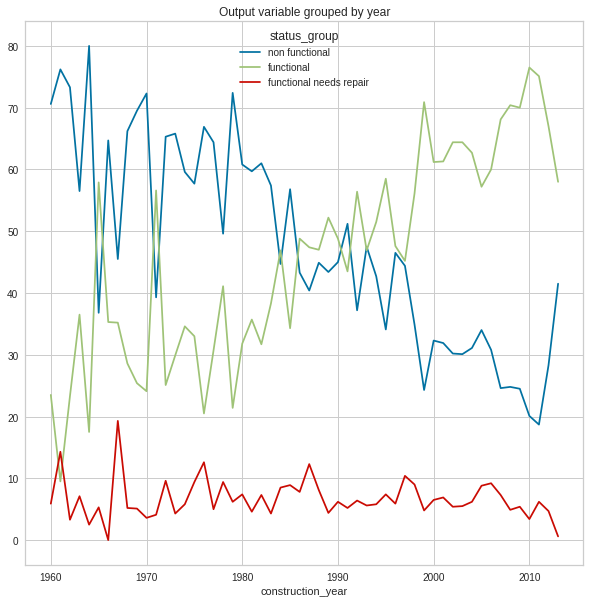

In [ ]:
check2.T[1:].plot(kind='line', figsize=(10, 10))
plt.title('Output variable grouped by year')

Construction year seems to be a healthy predictor of pump health status. The graph below shows, not surprisingly, that older pumps breakdown a lot more than the newer ones. There is also the '0' group which grouped missing construction year. 

Pumps needing repair are more or less evenly spread out by age of pump. This facts suggest either that newer pumps breakdown less frequently, or that maintenance is better lately, or both.

Text(0.5, 1.0, 'Pump Health Proportions by Construction Year (STACKED)\n(0 == unknown construction year)')

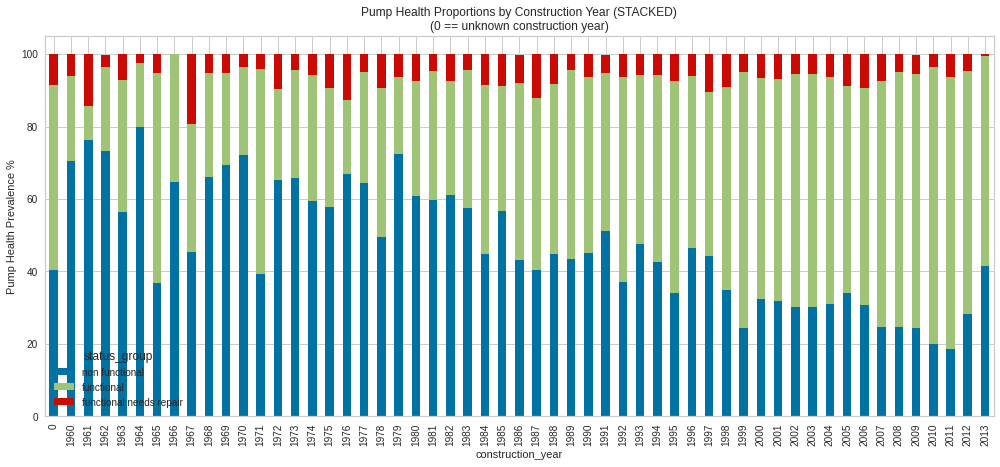

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
check2.transpose().plot(kind='bar', legend='status_group', stacked=True, ax=ax)
ax.set_ylabel('Pump Health Prevalence %')
ax.set_title(
    'Pump Health Proportions by Construction Year (STACKED)\n(0 == unknown construction year)'
)

Next, we wanted to have a look at the data by:

* Basin.  That is, what is the water source?
* By region.
* Whether or not there was a public meeting beforehand.
* What type of management scheme was used for the pump?
* Was there a permit issued to build this pump?
* What type of extraction is being used (there are two columns for extraction type, and we will be using only one).
* Who manages the pump?
* What type of management group, is it?
* What payment scheme is being used?
* What kind of water quality is there?
* How much water is available?
* What is the source of the water? Note, again, there are two columns with this data.
* Where is the water?



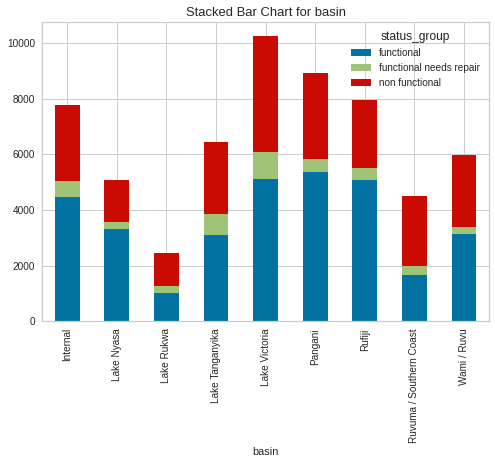

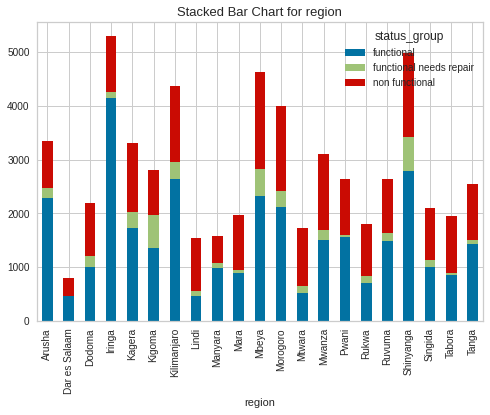

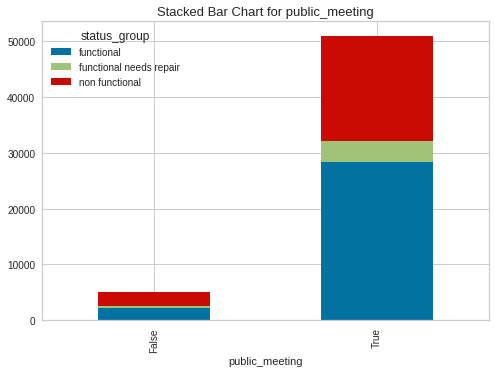

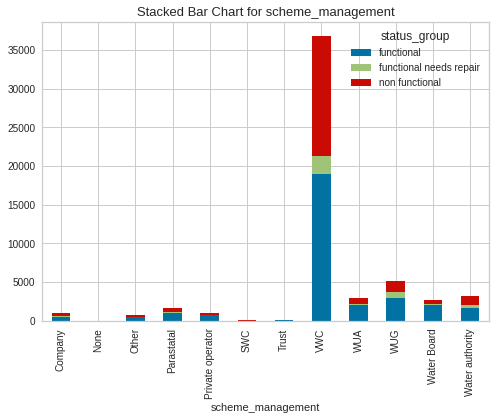

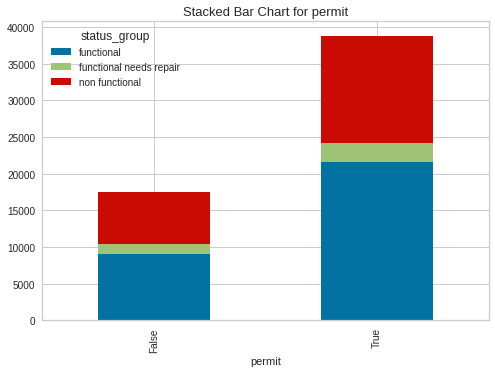

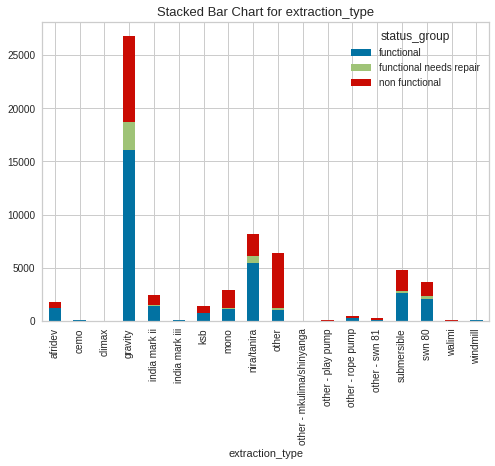

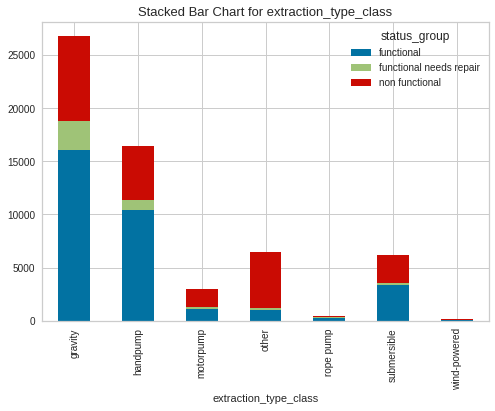

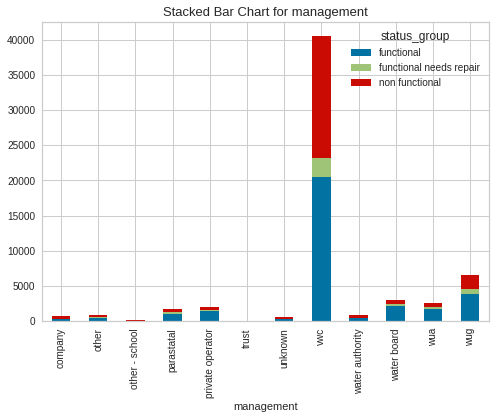

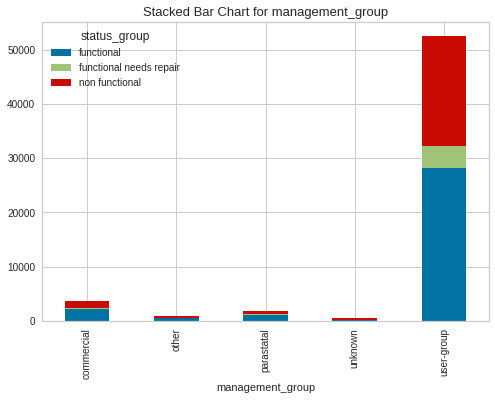

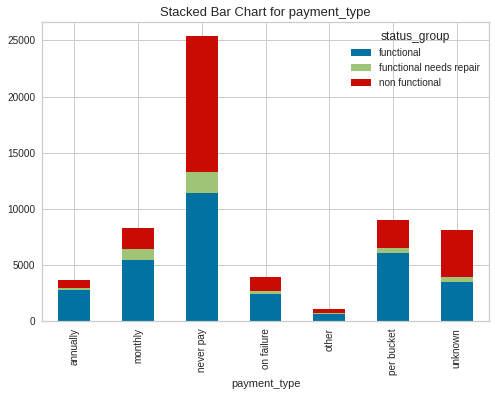

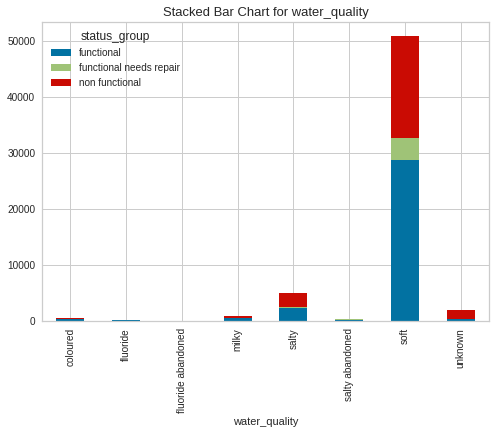

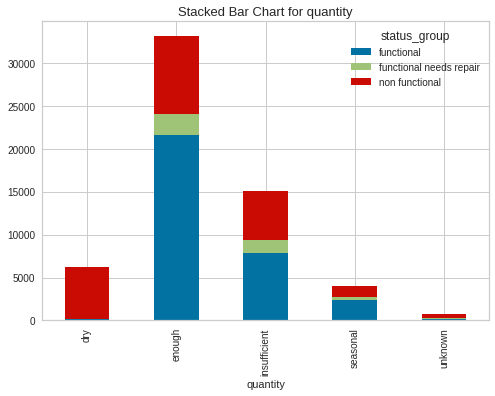

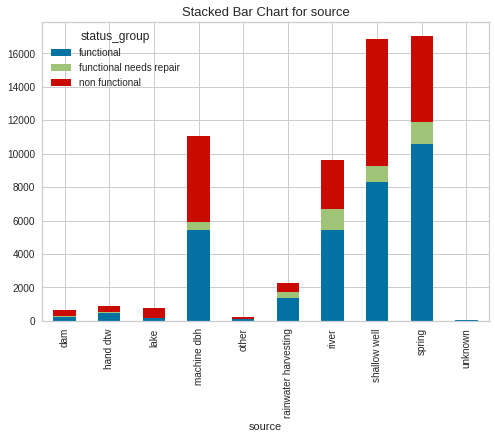

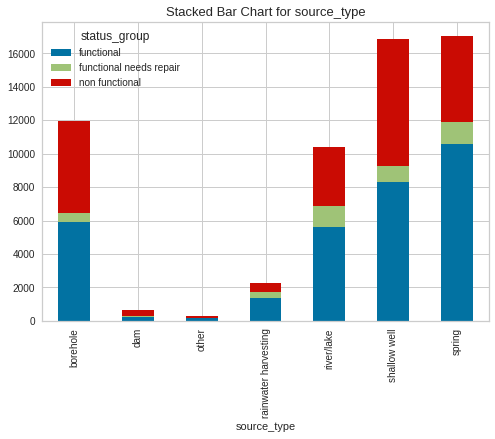

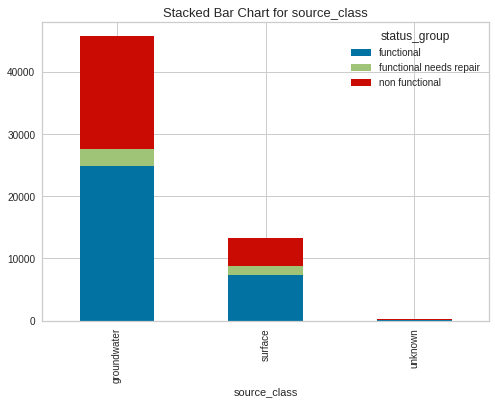

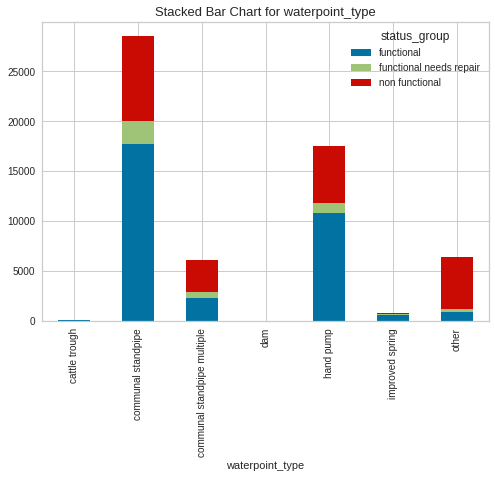

In [ ]:
check3 = [
    "basin", "region", "public_meeting", "scheme_management", "permit",
    "extraction_type", "extraction_type_class", "management",
    "management_group", "payment_type", "water_quality", "quantity", "source",
    "source_type", "source_class", "waterpoint_type"
]
for col in check3:
    ax = train_data.groupby([col, 'status_group'
                            ]).size().unstack().plot(kind='bar', stacked=True)
    ax.set_alpha(0.8)
    ax.set_title(f"Stacked Bar Chart for {col}", fontsize=13)

As we can see, older pumps are  mostly non functional. 

We can not really say which pumps need repair based merely on their age. 

There's also the '0' group that's missing the construction year. 

Next, we'll overlay the data onto a geographical location.

Text(0.5, 1.0, 'Tanzanian Water Pump Status')

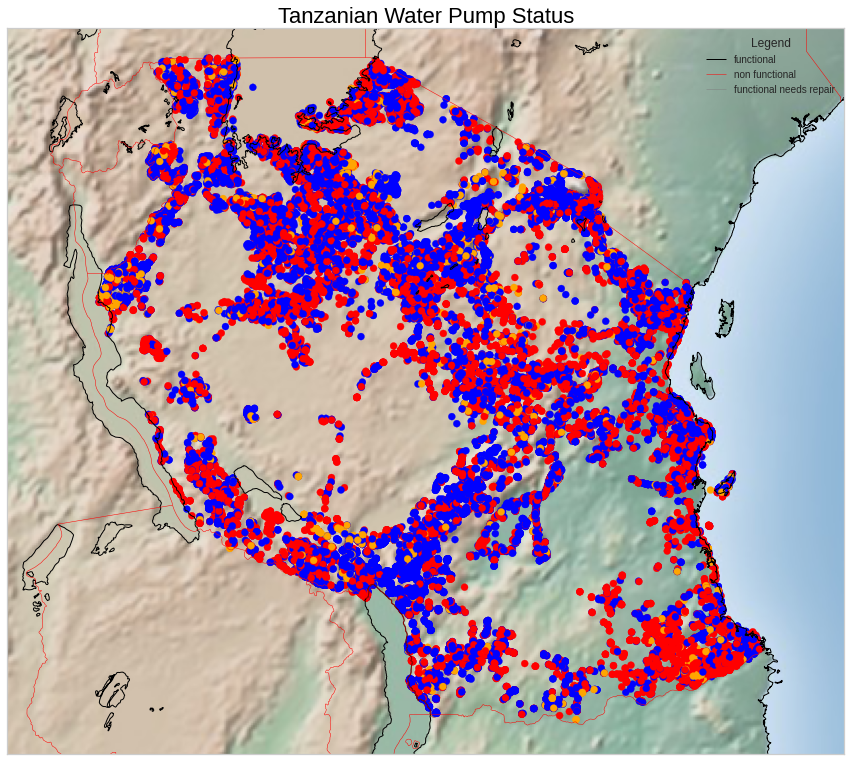

In [ ]:
lat = train_data['latitude'].values
lon = train_data['longitude'].values
colors = {
    'functional': 'blue',
    'non functional': 'red',
    'functional needs repair': 'orange'
}

# Tanzania
fig = plt.figure(figsize=(15, 15))
m = Basemap(projection='lcc',
            resolution='h',
            lat_0=-6.3690,
            lon_0=34.8888,
            width=1.5E6,
            height=1.3E6)
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawcountries(color='red')
m.drawstates(color='gray')

m.scatter(lon,
          lat,
          latlon=True,
          c=train_data['status_group'].apply(lambda x: colors[x]))

plt.legend(colors, loc=1, title='Legend')
plt.title('Tanzanian Water Pump Status', color='black', fontsize=22)

Plotting the latitude against longitude while segmenting by the operational status of the pump gives us an intuitive locational layout of the operational status across Tanzania.

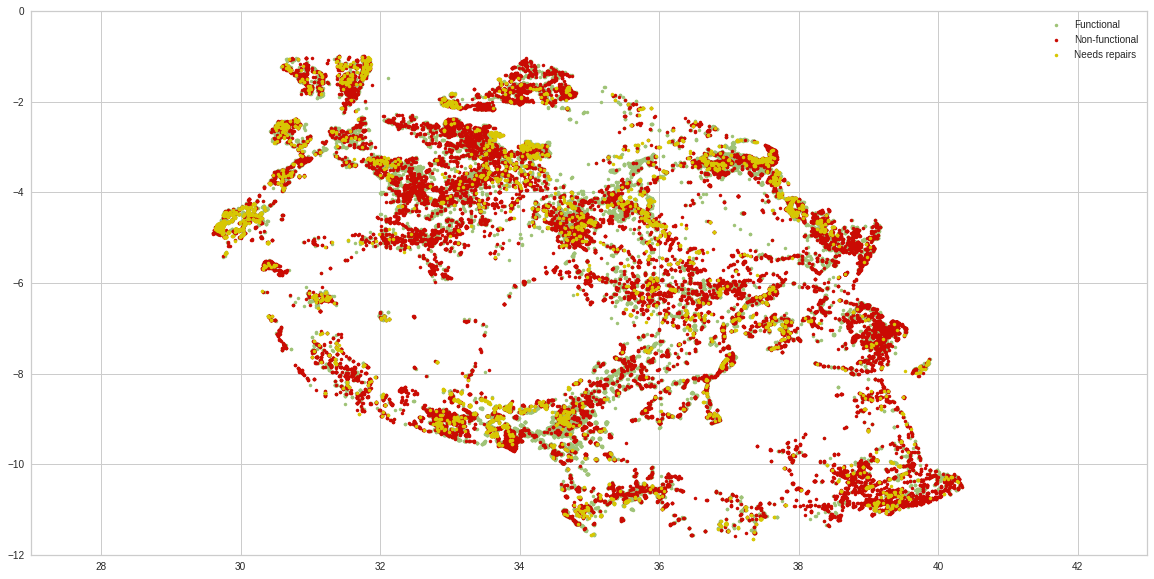

In [ ]:
#to check the pump status considering the geographical location
functional = train_data[train_data['status_group'] == 'functional']
nonfunctional = train_data[train_data['status_group'] == 'non functional']
repair = train_data[train_data['status_group'] == 'functional needs repair']

plt.figure(figsize=(20, 10))
plt.plot(functional.longitude, functional.latitude, 'g.')
plt.plot(nonfunctional.longitude, nonfunctional.latitude, 'r.')
plt.plot(repair.longitude, repair.latitude, 'y.')
plt.legend(['Functional', 'Non-functional', 'Needs repairs'])
plt.axis([27, 43, -12, 0])
plt.grid(True)

Lastly, we'll use a heat map to visualize the NaN values, to see where they are located in the dataset.

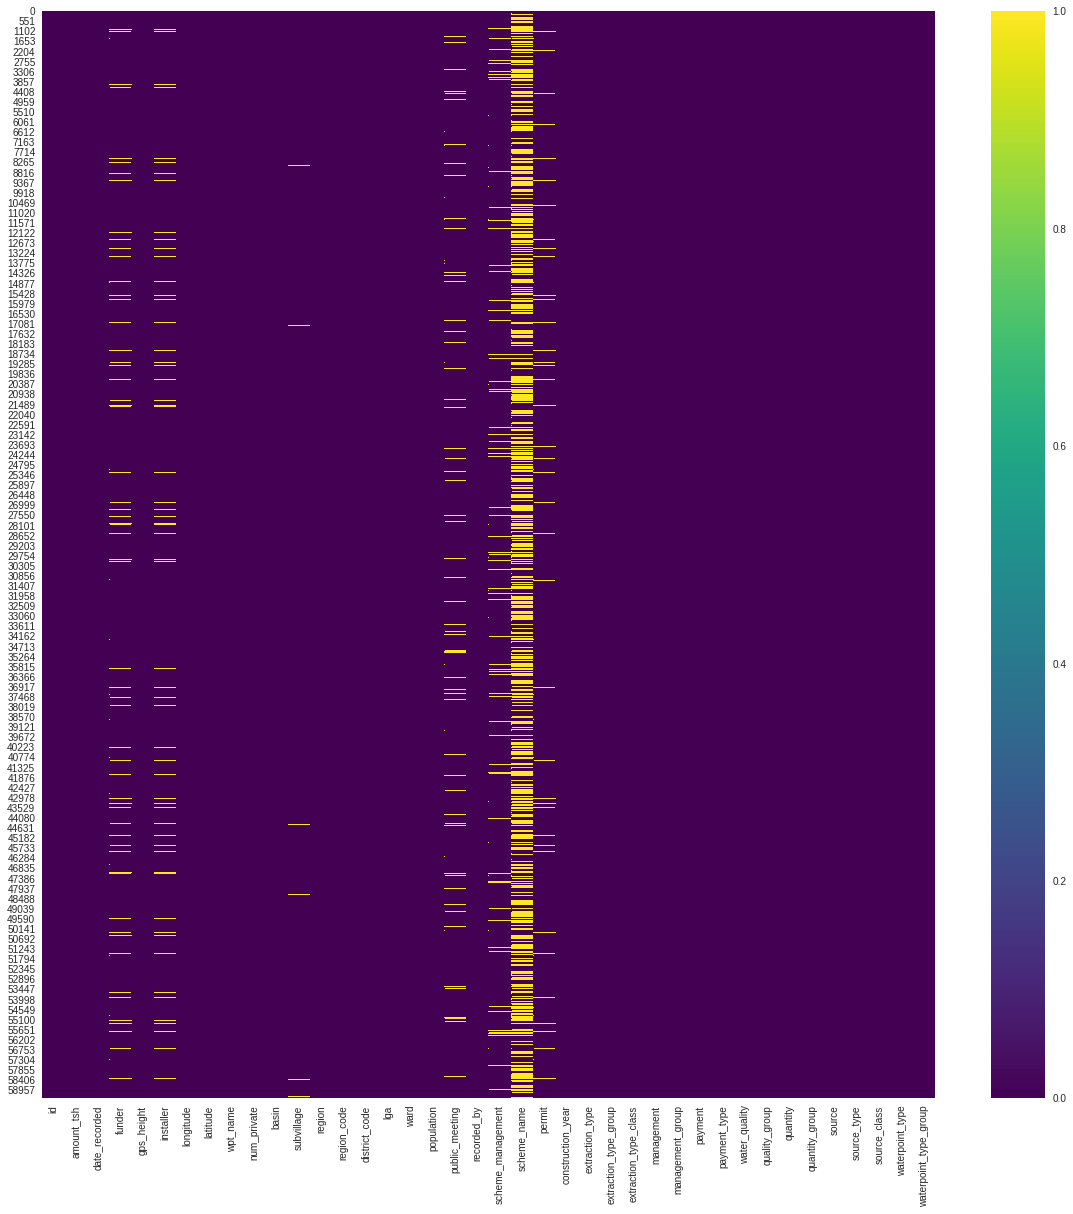

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))  #visual way to view NaNs
sns.heatmap(training_set_values.isnull(), cmap='viridis')

As we can see there are so many nulls in scheme_name so we droped that column completely.

# Data Cleanup

Based on our analysis, as well as looking at the data in excel, we determined to go with the below items for our train/test split:

* amount_tsh - Total static head (amount water available to waterpoint)
* gps_height - the altitude of the well.  This is needed for geo-locating.
* longitude - the longitude of the well.  This is needed for geo-locating.
* latitude - latitude of the well.  This is needed for geo-locating. 
* region_code - geographic location number
* lga - geographic location
* population - this will let us know the population around the well.  High use could lead to low water levels.
* public_meeting - this is worth keeping, as there may be a correlation between the public's interest/need and well maintenance.
* scheme_management - who opeartes the well point.  There are different management groups, with different funding and different goals.
* permit - if the water point is permitted.  This may play into well head maintenance.  A permitted well head will likely have regular inspections.
* construction_year - older equipment is less likely to be functioning optimally.
* extraction_type_class - different extraction methods require different types of equipment, which means more or different maintenance.<br> 

   **Note:** There are multiple columns for this piece that all seem similar.  Extraction_type, extraction_type_group and extraction_type_class.  We chose extraction_type_class.
* management_group - how the water point is managed.  How its managed will play a part in the maintenance and functionality of the pump. 
* payment - what the water costs.  This, again, determines how much money is available for maintenance.

   **Note:** This column is duplicated with the payment_type column, so we chose payment.
* water_quality - the quality of the water - and what it leaves behind - can cause wear and tear on pumping equipment.  Silt clogging the intake, for example. 
* quantity - how much water is available.  Insufficient availability will mean the pump has no water to draw.  
* source_type - the source type of the water.  A bore hole will need different pumping equipment than a dam. 

   **Note:** This column is duplicated with the source_class and source columns, so we chose source_type.
* waterpoint_type - the type of waterpoint.  A hand pump has more moving parts than a trough, for example.  

   **Note:** This column is duplicated with the waterpoint_type_group column, so we chose waterpoint_type.
* status_group - this is the variable we're trying to predict, so we need this. 

In [ ]:
# aren't useful:

not_useful = [
    'id', 'funder', 'installer', 'wpt_name', 'num_private', 'basin',
    'date_recorded', 'subvillage', 'region', 'district_code', 'ward',
    'recorded_by', 'scheme_name', 'extraction_type', 'extraction_type_group',
    'management', 'payment_type', 'quality_group', 'quantity_group', 'source',
    'source_class', 'waterpoint_type_group'
]

for i in not_useful:
    del train_data[i]
    del test_set_values[i]

print(train_data.shape)
print(test_set_values.shape)
print(training_set_labels.shape)
print(train_data.columns)

(59400, 19)
(14850, 18)
(59400, 2)
Index(['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code',
       'lga', 'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'payment', 'water_quality', 'quantity', 'source_type',
       'waterpoint_type', 'status_group'],
      dtype='object')


# Data Cleanup Part 2
Here we will handle the missing values 



In [ ]:
train_data.isnull().sum().sort_values(ascending=False)

scheme_management        3877
public_meeting           3334
permit                   3056
gps_height                  0
longitude                   0
latitude                    0
region_code                 0
lga                         0
population                  0
status_group                0
waterpoint_type             0
construction_year           0
extraction_type_class       0
management_group            0
payment                     0
water_quality               0
quantity                    0
source_type                 0
amount_tsh                  0
dtype: int64

Longitude and latitude and gps height outliers, we:
*   Set the corresponding longitude or latitude value to 0 if the longitude or latitude was 0.
*  Set any 0 or 1 or the outlier -0.00000002, to NaN
*  Then applied the mean longitude, latitude and gps scores to the NaN values.

For the region code, we filled any missing or blank data with the mean region code.

For the public_meeting and permit blank values, we randomly picked the values from the existing distribution of values of that column.  We felt this was a better method than picking one or the other.

For the construction_year column, we filled 0 values with a random selection based on the existing distribution of the values.  Again, we felt this was better than arbitrarily selecting a value.  

For scheme_management, we repeated the process whereby we randomly assigned a management scheme based on the existing distribution of the values.  

In [ ]:
trans = ['longitude', 'latitude', 'gps_height']
for i in [train_data, test_set_values]:
    i.loc[i.longitude == 0, 'latitude'] = 0
for z in trans:
    for i in [train_data, test_set_values]:
        i[z].replace(0., np.NaN, inplace=True)
        i[z].replace(1., np.NaN, inplace=True)
        i[z].replace(-0.00000002, np.NaN, inplace=True)

    for j in ['region_code']:
        train_data['mean'] = train_data.groupby([j])[z].transform('mean')
        train_data[z] = train_data[z].fillna(train_data['mean'])
        o = train_data.groupby([j])[z].mean()
        fill = pd.merge(test_set_values,
                        pd.DataFrame(o),
                        left_on=[j],
                        right_index=True,
                        how='left').iloc[:, -1]
        test_set_values[z] = test_set_values[z].fillna(fill)

    train_data[z] = train_data[z].fillna(train_data[z].mean())
    test_set_values[z] = test_set_values[z].fillna(train_data[z].mean())
    del train_data['mean']

z = ['public_meeting', 'permit']
for i in z:
    train_data[i].fillna(True, inplace=True)
    train_data[i] = train_data[i].apply(lambda x: float(x))
    test_set_values[i].fillna(True, inplace=True)
    test_set_values[i] = test_set_values[i].apply(lambda x: float(x))

# Fill 0 values in construction_year column with existing distribution of values

years = train_data['construction_year'].loc[
    train_data['construction_year'] != 0].values
zero_index = train_data['construction_year'].loc[train_data['construction_year']
                                                 == 0].index
train_data['construction_year'].loc[train_data['construction_year'] ==
                                    0] = np.random.choice(
                                        years, len(zero_index))

# Fill NaN values in scheme_management column with existing distribution of values

existing_values = train_data['scheme_management'].loc[
    train_data['scheme_management'].notnull()].values
nan_index = train_data['scheme_management'].iloc[np.where(
    train_data['scheme_management'].isnull())[0]].index
train_data['scheme_management'].loc[np.where(
    train_data['scheme_management'].isnull())[0]] = np.random.choice(
        existing_values, len(nan_index))

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


This cleaned up all the null values.

In [ ]:
train_data.isnull().sum()

amount_tsh               0
gps_height               0
longitude                0
latitude                 0
region_code              0
lga                      0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type_class    0
management_group         0
payment                  0
water_quality            0
quantity                 0
source_type              0
waterpoint_type          0
status_group             0
dtype: int64

In [ ]:
train_data.head()

,amount_tsh,gps_height,longitude,latitude,region_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type_class,management_group,payment,water_quality,quantity,source_type,waterpoint_type,status_group
0,6000.0,1390.0,34.938093,-9.856322,11,Ludewa,109,1.0,VWC,0.0,1999,gravity,user-group,pay annually,soft,enough,spring,communal standpipe,functional
1,0.0,1399.0,34.698766,-2.147466,20,Serengeti,280,1.0,Other,1.0,2010,gravity,user-group,never pay,soft,insufficient,rainwater harvesting,communal standpipe,functional
2,25.0,686.0,37.460664,-3.821329,21,Simanjiro,250,1.0,VWC,1.0,2009,gravity,user-group,pay per bucket,soft,enough,dam,communal standpipe multiple,functional
3,0.0,263.0,38.486161,-11.155298,90,Nanyumbu,58,1.0,VWC,1.0,1986,submersible,user-group,never pay,soft,dry,borehole,communal standpipe multiple,non functional
4,0.0,23.0,31.130847,-1.825359,18,Karagwe,0,1.0,VWC,1.0,2011,gravity,other,never pay,soft,seasonal,rainwater harvesting,communal standpipe,functional


# OneHotEncoding

We have both object and int64 type data.  In order to normalize this data, we decided to onehotencode the dataframe.  

In [ ]:
pd.value_counts(train_data['payment'])

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [ ]:
training_set_labels['status_group'].head()

0        functional
1        functional
2        functional
3    non functional
4        functional
Name: status_group, dtype: object

First we set the train_test split.

In [ ]:
train_set, test_set = train_test_split(train_data,
                                       test_size=0.2,
                                       random_state=42)

In [ ]:
target = 'status_group'
features = list(train_set.columns)
features = [f for f in features if f != target]

In [ ]:
X_tr = train_set[features]
y_tr = train_set[[target]]
print(y_tr)
X_te = test_set[features]
y_te = test_set[[target]]

         status_group
3607       functional
50870      functional
20413  non functional
52806  non functional
50091  non functional
...               ...
54343      functional
38158      functional
860    non functional
15795      functional
56422  non functional

[47520 rows x 1 columns]


**Next**, we Hotencoded the categorical features and scaled the numeric features, then we transformed the data. 

In [ ]:
categorical_features = [
    'region_code', 'lga', 'scheme_management', 'extraction_type_class',
    'management_group', 'payment', 'water_quality', 'quantity', 'source_type',
    'waterpoint_type'
]
cat_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = [
    feature for feature in X_tr.columns if feature not in categorical_features
]
num_transformer = Pipeline([('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[(
    'cat', cat_transformer,
    categorical_features), ('num', num_transformer, numeric_features)])

#Fit and transform the data

preprocessor.fit(X_tr)
X_train_transformed = preprocessor.transform(X_tr)
X_test_transformed = preprocessor.transform(X_te)

In [ ]:
# Just to visualize if scaling and one hot coding are applied correctly
X_train_transformed = pd.DataFrame(X_train_transformed.A)
X_train_transformed.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.084999,1.968339,0.128781,0.560226,-0.041306,0.306797,0.648002,0.093153
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.100621,0.002395,0.161191,0.026833,-0.379739,0.306797,0.648002,0.655050


In [ ]:
X_test_transformed = pd.DataFrame(X_test_transformed.A)
X_test_transformed.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.100621,0.648801,-1.197784,0.785070,-0.379739,0.306797,0.648002,0.976135
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.100621,0.002395,-0.871130,0.304597,-0.379739,0.306797,0.648002,0.253695
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.097497,1.225783,0.152791,0.555023,-0.066689,0.306797,0.648002,0.895864
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

Now our data is cleaned, separated into a train/test split, and we can run some machine learning models.

#Machine Learning Models

#### 1)   Logistic Regression

In [ ]:
logit_clf = LogisticRegression(max_iter=700, random_state=42, n_jobs=-1)

parameters = {'C': [0.01, 0.1, 0.5, 0.7]}

logit_clf_grid = GridSearchCV(logit_clf, parameters, cv=4)

logit_clf_grid.fit(X_train_transformed, y_tr.values.ravel())

GridSearchCV(cv=4, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=700, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.5, 0.7]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [ ]:
logit_clf_grid.best_estimator_

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=700,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
y_pred_train = logit_clf_grid.best_estimator_.predict(X_train_transformed)
accuracy_score(y_tr, y_pred_train)

0.7473274410774411

In [ ]:
y_pred_test = logit_clf_grid.best_estimator_.predict(X_test_transformed)
accuracy_score(y_te, y_pred_test)

0.7444444444444445

In [ ]:
trainConfusionMtrx = confusion_matrix(y_tr, y_pred_train)
print("Confusion Matrix: \n", trainConfusionMtrx)
print("Classification Report:\n", classification_report(y_tr, y_pred_train))

Confusion Matrix: 
 [[23032   194  2576]
 [ 2370   423   673]
 [ 6054   140 12058]]
Classification Report:
                          precision    recall  f1-score   support

             functional       0.73      0.89      0.80     25802
functional needs repair       0.56      0.12      0.20      3466
         non functional       0.79      0.66      0.72     18252

               accuracy                           0.75     47520
              macro avg       0.69      0.56      0.57     47520
           weighted avg       0.74      0.75      0.73     47520



Precision and recall are acceptable for the functional and non functional values.  

Recall, however, is not great for the middle 'needs repair' outcome.  F1 score is also low for that category.

In [ ]:
testConfusionMtrx = confusion_matrix(y_te, y_pred_test)
print("Confusion Matrix: \n", testConfusionMtrx)
print("Classification Report:\n", classification_report(y_te, y_pred_test))

Confusion Matrix: 
 [[5766   59  632]
 [ 582   93  176]
 [1547   40 2985]]
Classification Report:
                          precision    recall  f1-score   support

             functional       0.73      0.89      0.80      6457
functional needs repair       0.48      0.11      0.18       851
         non functional       0.79      0.65      0.71      4572

               accuracy                           0.74     11880
              macro avg       0.67      0.55      0.57     11880
           weighted avg       0.73      0.74      0.72     11880



Precision and recall are acceptable for the functional and non functional values.  

Recall, however, is not great for the middle 'needs repair' outcome.  F1 score is also low for that category.

In [ ]:
print('Accuracy score on train set:', accuracy_score(y_tr, y_pred_train))
print('Accuracy score on test set:', accuracy_score(y_te, y_pred_test))

Accuracy score on train set: 0.7473274410774411
Accuracy score on test set: 0.7444444444444445


##  2) K-Nearest Neighbors

In [ ]:
#import the training and test sets, set them up for my own use
X_train_knn = preprocessor.transform(X_tr)
X_test_knn = preprocessor.transform(X_te)
y_train_knn = y_tr['status_group'].astype('category').cat.codes
y_test_knn = y_te['status_group'].astype('category').cat.codes

KNN = KNeighborsClassifier()  # Setting up the KNN classifier

Here, we will tune the hyperparameter by choosing the best nearest neighbors from a search of 1-25.

In [ ]:
param_grid = {'n_neighbors': np.arange(3, 12)}  #Find the optimal neighbors

grid_search_KNN = GridSearchCV(KNN, param_grid, cv=5, scoring='accuracy')
grid_search_KNN.fit(X_train_knn, y_train_knn)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_search_KNN.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

It looks like the best estimator is 6 neighbors, with an accuracy score of 0.764646

In [ ]:
# Setting up and showing the training accuracy score
KNN_y_pred_train = grid_search_KNN.best_estimator_.predict(X_train_knn)
accuracy_score(y_train_knn, KNN_y_pred_train)

0.8198863636363637

In [ ]:
# Setting up and showing the testing accuracy score
KNN_y_pred_test = grid_search_KNN.best_estimator_.predict(X_test_knn)
accuracy_score(y_test_knn, KNN_y_pred_test)

0.7632996632996633

In [ ]:
# Training confusion matrix
KNNtrainConfusionMtrx = confusion_matrix(y_train_knn, KNN_y_pred_train)
print("Confusion Matrix: \n", KNNtrainConfusionMtrx)
print("Classification Report:\n",
      classification_report(y_train_knn, KNN_y_pred_train))

Confusion Matrix: 
 [[24130   325  1347]
 [ 1789  1255   422]
 [ 4375   301 13576]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86     25802
           1       0.67      0.36      0.47      3466
           2       0.88      0.74      0.81     18252

    accuracy                           0.82     47520
   macro avg       0.78      0.68      0.71     47520
weighted avg       0.82      0.82      0.81     47520



Precision and recall are acceptable for the functional and non functional values.  

Recall is better for the middle 'needs repair' outcome than in the logistic regression.  F1 score for that category also saw an improvement.

In [ ]:
# Testing confusion matrix
KNNtestConfusionMtrx = confusion_matrix(y_test_knn, KNN_y_pred_test)
print("Confusion Matrix: \n", KNNtestConfusionMtrx)
print("Classification Report:\n",
      classification_report(y_test_knn, KNN_y_pred_test))

Confusion Matrix: 
 [[5746  147  564]
 [ 491  230  130]
 [1367  113 3092]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82      6457
           1       0.47      0.27      0.34       851
           2       0.82      0.68      0.74      4572

    accuracy                           0.76     11880
   macro avg       0.68      0.61      0.63     11880
weighted avg       0.76      0.76      0.75     11880



Precision and recall are acceptable for the functional and non functional values.  

Recall is better for the middle 'needs repair' outcome than in the logistic regression, but still not great.  F1 score for that category also saw an improvement.

In [ ]:
# Results

print('Accuracy score on train set:',
      accuracy_score(y_train_knn, KNN_y_pred_train))
print('Accuracy score on test set:', accuracy_score(y_test_knn,
                                                    KNN_y_pred_test))

Accuracy score on train set: 0.8198863636363637
Accuracy score on test set: 0.7632996632996633


Applying the trained KNN model to the test set results in an accuracy score of 76.33%.

## 3) Neural Network

In [ ]:
X_tr = train_set[features]
y_tr = train_set[[target]]
X_te = test_set[features]
y_te = test_set[[target]]

X_train_nn = preprocessor.transform(X_tr)
X_test_nn = preprocessor.transform(X_te)
y_train_nn = y_tr['status_group'].astype('category').cat.codes
y_test_nn = y_te['status_group'].astype('category').cat.codes

In [ ]:
parameters = {
    'learning_rate_init': [0.01, 0.1],
    'hidden_layer_sizes': [(100, 50, 3), (218, 100, 3), (218, 100, 50, 3)],
    'alpha': [0.01, 0.1],
}

mlp_clf = MLPClassifier(early_stopping=True)
MlpClf = GridSearchCV(mlp_clf,
                      param_grid=parameters,
                      n_jobs=-1,
                      scoring='accuracy')
MlpClf.fit(X_train_nn, y_train_nn)

print('Best parameters for MLP: ', MlpClf.best_estimator_)

y_pred_train = MlpClf.best_estimator_.predict(X_train_nn)
print("Accuracy score for train set: ", accuracy_score(y_train_nn,
                                                       y_pred_train))

y_pred_test = MlpClf.best_estimator_.predict(X_test_nn)
print("Accuracy score for test set: ", accuracy_score(y_test_nn, y_pred_test))

Best parameters for MLP:  MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(218, 100, 3), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
Accuracy score for train set:  0.8115319865319865
Accuracy score for test set:  0.7741582491582492


In [ ]:
testConfusionMtrx = confusion_matrix(y_test_nn, y_pred_test)
print("Confusion Matrix: \n", testConfusionMtrx)
print("Classification Report:\n", classification_report(y_test_nn, y_pred_test))

Confusion Matrix: 
 [[5652  157  648]
 [ 481  224  146]
 [1177   74 3321]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82      6457
           1       0.49      0.26      0.34       851
           2       0.81      0.73      0.76      4572

    accuracy                           0.77     11880
   macro avg       0.69      0.62      0.64     11880
weighted avg       0.77      0.77      0.77     11880



Precision and recall are acceptable for the functional and non functional values.  

Recall is still low for the middle 'needs repair' outcome than in the other two.  F1 score for that category is about the same as with KNN.  An improvement over logistic regression, but nothing spectacular.

Applying the trained MLP model to the test set results in an accuracy score of 76.85%.

## 4) Random Forest

Hyperparameter tuning

In [ ]:
rf = RandomForestClassifier(criterion='gini',
                            n_estimators=500,
                            max_features='auto',
                            oob_score=True,
                            random_state=42,
                            n_jobs=-1)

param_grid = {
    "min_samples_split": [4, 6, 8],
    "n_estimators": [50, 100, 150],
    "max_depth": [4, 8, 10]
}

gs = GridSearchCV(estimator=rf,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2,
                  n_jobs=-1)

gs = gs.fit(X_train_transformed, y_tr.values.ravel())

print(gs.best_score_)
print(gs.best_params_)
print(gs.best_estimator_)

0.7454124579124579
{'max_depth': 10, 'min_samples_split': 4, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)


Model execution and evaluation

In [ ]:
y_pred_train = gs.best_estimator_.predict(X_train_transformed)
accuracy_score(y_tr, y_pred_train)

0.7519991582491582

In [ ]:
y_pred_test = gs.best_estimator_.predict(X_test_transformed)
accuracy_score(y_te, y_pred_test)

0.7441077441077442

In [ ]:
ConfusionMtrx_tr = confusion_matrix(y_tr, y_pred_train)
print("Confusion Matrix_tr: \n", ConfusionMtrx_tr)
print("Classification Report_tr:\n", classification_report(y_tr, y_pred_train))

Confusion Matrix_tr: 
 [[24910    47   845]
 [ 2955   169   342]
 [ 7574    22 10656]]
Classification Report_tr:
                          precision    recall  f1-score   support

             functional       0.70      0.97      0.81     25802
functional needs repair       0.71      0.05      0.09      3466
         non functional       0.90      0.58      0.71     18252

               accuracy                           0.75     47520
              macro avg       0.77      0.53      0.54     47520
           weighted avg       0.78      0.75      0.72     47520



Precision and recall are acceptable for the functional and non functional values.  

Recall is abysmal for the 'needs repair' outcome, as is the F1 score.  It appears that Random Forest cannot quite predict the middle category with much accuracy.

In [ ]:
ConfusionMtrx_te = confusion_matrix(y_te, y_pred_test)
print("Confusion Matrix_te: \n", ConfusionMtrx_te)
print("Classification Report_te:\n", classification_report(y_te, y_pred_test))

Confusion Matrix_te: 
 [[6193   13  251]
 [ 732   36   83]
 [1951   10 2611]]
Classification Report_te:
                          precision    recall  f1-score   support

             functional       0.70      0.96      0.81      6457
functional needs repair       0.61      0.04      0.08       851
         non functional       0.89      0.57      0.69      4572

               accuracy                           0.74     11880
              macro avg       0.73      0.52      0.53     11880
           weighted avg       0.76      0.74      0.71     11880



Precision and recall are acceptable for the functional and non functional values.  

Recall is even worse for the 'needs repair' outcome on the test set, as is the F1 score.  Random Forest really cannot quite predict the middle category with much accuracy.

In [ ]:
print('Accuracy score on train set:', accuracy_score(y_tr, y_pred_train))
print('Accuracy score on test set:', accuracy_score(y_te, y_pred_test))

Accuracy score on train set: 0.7519991582491582
Accuracy score on test set: 0.7441077441077442


Applying the Random Forest model to the test set results in an accuracy score of 74.41%.


## 5) GradientBoosting

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
GB_Classifier = GradientBoostingClassifier(random_state=42)

parameter_GB_Classifier = {
    "learning_rate": [0.01, 0.1, 1.0],
    "n_estimators": [50, 100],
    "max_depth": [5, 10]
}
GB = RandomizedSearchCV(estimator=GB_Classifier,
                        param_distributions=parameter_GB_Classifier,
                        n_iter=30,
                        scoring='accuracy',
                        cv=2,
                        n_jobs=-1)

GB = GB.fit(X_train_transformed, y_tr.values.ravel())

print(GB.best_score_)
print(GB.best_params_)
print(GB.best_estimator_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 12 is smaller than n_iter=30. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0.7881313131313131
{'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}
GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=10,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
y_pred_train = GB.best_estimator_.predict(X_train_transformed)
accuracy_score(y_tr, y_pred_train)

0.8908880471380471

In [ ]:
y_pred_test = GB.best_estimator_.predict(X_test_transformed)
accuracy_score(y_te, y_pred_test)

0.7985690235690236

In [ ]:
print('Accuracy score on train set:', accuracy_score(y_tr, y_pred_train))
print('Accuracy score on test set:', accuracy_score(y_te, y_pred_test))

Accuracy score on train set: 0.8908880471380471
Accuracy score on test set: 0.7985690235690236


In [ ]:
ConfusionMtrx_tr2 = confusion_matrix(y_tr, y_pred_train)
print("Confusion Matrix_tr2: \n", ConfusionMtrx_tr2)
print("Classification Report_tr2:\n", classification_report(y_tr, y_pred_train))

Confusion Matrix_tr2: 
 [[25083    68   651]
 [ 1222  1999   245]
 [ 2944    55 15253]]
Classification Report_tr2:
                          precision    recall  f1-score   support

             functional       0.86      0.97      0.91     25802
functional needs repair       0.94      0.58      0.72      3466
         non functional       0.94      0.84      0.89     18252

               accuracy                           0.89     47520
              macro avg       0.91      0.79      0.84     47520
           weighted avg       0.90      0.89      0.89     47520



Precision and recall are very good for the functional and non functional values.  We think this model overfit the data.

Recall is among the best for the 'needs repair' outcome, as is the F1 score.

In [ ]:
ConfusionMtrx_te2 = confusion_matrix(y_te, y_pred_test)
print("Confusion Matrix_te2: \n", ConfusionMtrx_te2)
print("Classification Report_tr:\n", classification_report(y_te, y_pred_test))

Confusion Matrix_te2: 
 [[5857  141  459]
 [ 480  247  124]
 [1127   62 3383]]
Classification Report_tr:
                          precision    recall  f1-score   support

             functional       0.78      0.91      0.84      6457
functional needs repair       0.55      0.29      0.38       851
         non functional       0.85      0.74      0.79      4572

               accuracy                           0.80     11880
              macro avg       0.73      0.65      0.67     11880
           weighted avg       0.79      0.80      0.79     11880



Against the test set, though, recall and F1 for the middle variable went back down.  

Based on the recall and f1 scores, we feel this model is likely overfit.

#  Best Model Selection

Since gradient boosting was overfit, we decided to use the Neural Network as our selection.

In [ ]:
#Code here
MlpClf.best_estimator_

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(218, 100, 3), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

# Trained Models Applied to the Test set

We'll now apply the best trained model to the test set, and see what we come up with.  

In [ ]:
# Using test set to predict labels
y_pred_test = MlpClf.best_estimator_.predict(X_test_nn)

In [ ]:
# Generating metrics for best models
print("Accuracy score for test set: ", accuracy_score(y_test_nn, y_pred_test))

testConfusionMtrx = confusion_matrix(y_test_nn, y_pred_test)
print("Confusion Matrix: \n", testConfusionMtrx)
print("Classification Report:\n", classification_report(y_test_nn, y_pred_test))

Accuracy score for test set:  0.7741582491582492
Confusion Matrix: 
 [[5652  157  648]
 [ 481  224  146]
 [1177   74 3321]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82      6457
           1       0.49      0.26      0.34       851
           2       0.81      0.73      0.76      4572

    accuracy                           0.77     11880
   macro avg       0.69      0.62      0.64     11880
weighted avg       0.77      0.77      0.77     11880



# Conclusion

If this data set didn't have the middle 'functional needs repair' classification, any of our models would have worked adequately.  All seemed to have a good overall preciaion and recall scores on both test and training, but relatively lower recall and precision with regards to predicting the 'functonal needs repair' category.

But, since the data set DID include this third category, that threw a wrench into the works (and likely the water pumps, too!).

If we were to approach this in a different way, we would focus on optimizing the algorithms to get the highest recall and precision in that 'functional needs repair' variable.  The underlying assumption would be that, if the recall and precision are good at predicting whether the pump is functional but needs repair, the other two, more binary, categories would be properly fit and trained. 

As it stands, however, there may not be enough data included in the sheets to predict that middle category with any sort of overall accuracy.  A pump that needs repair still works, after all, so it does fall into the 'functional' category.  But since it's not working optimally, it may shortly become non-functional. A 'time since last maintenance' variable could be added, with another column for 'expected service life' of each water pump type would be most helpful in these predictions.

There may, in fact, be a real world workaround to this problem that does not involve algorithms for the time being.  A way for community members to report the functionality of these pumps to either the pump maintainer or the local government, to be fixed.  Or a way to insist on regular maintenance schedules as part of the application and installation process. Or, barring that, a method of installing lower-tech pumps going forward.  Fewer moving parts generally means fewer failure points.  



